# Numerical Simulation of percolation threshold

In [41]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

parr = np.linspace(0.1, 0.95, 20) # Define fraction of susceptible sites
pcr2 = np.zeros((20,))
pcr = np.zeros((20,))

for v in range(len(parr)):
    for u in range(20):
        L = [0] * 10**3  # Total number of sites or nodes in the small-world network
        Susceptable = (parr[v])*len(L)  # Number of susceptable sites
        Susceptable_Indices = []
        Shortcut_Connections = []
        K = 1 # A site is connected only to it's immediate neighbours
        phi = 10**-4 # Average number of shortcuts per bond
        shortcuts = math.ceil(phi*K*len(L)) # Number of shortcuts
        #print(shortcuts)

        # Randomly choose susceptable sites
        while len(Susceptable_Indices) < int(parr[v]*len(L)):
            temp = int(np.random.randint(0, len(L)))
            if temp not in Susceptable_Indices:
                L[temp] = 1
            else:
                continue
            Susceptable_Indices.append(temp)

        #print(len(Susceptable_Indices))
        #print(Susceptable_Indices)

        import copy

        #print(len(Susceptable_Indices))
        #print(Susceptable_Indices)
        Susceptable_Indices.sort()
        #print(Susceptable_Indices)

        # Locate local clusters
        Susceptable_Indices_temp = copy.copy(Susceptable_Indices)
        local_clusters = [Susceptable_Indices_temp[0]]
        for i in range(len(Susceptable_Indices_temp)):
                if Susceptable_Indices_temp[i] == local_clusters[-1] + 1:
                    local_clusters.append(Susceptable_Indices_temp[i])
                else:
                    local_clusters.append('-')
                    local_clusters.append(Susceptable_Indices_temp[i])
                    i = i+1

        #print()            
        #print(local_clusters)

        local_clusters = local_clusters[2:]
        #print(local_clusters)

        def getIndexPositions(listOfElements, element):
            indexPosList = []
            for i in range(len(listOfElements)): 
                if listOfElements[i] == element:
                    indexPosList.append(i)
            return indexPosList

        indexPosList = getIndexPositions(local_clusters, '-')
        #print("Indexes of '-': {}".format(indexPosList))

        res = [local_clusters[i : j] for i, j in zip([0] + indexPosList, indexPosList + [None])]
        #print(res)
        res_temp = copy.copy(res)
        for i in range(len(res_temp)):
                if '-' in res_temp[i]:
                    res_temp[i].remove('-')
                    res_temp[i] = np.array(res_temp[i])
                else:
                    continue
        res_temp[0] = np.array(res_temp[0])
        #print(res_temp)
        #print(len(res_temp))

        for i in range(shortcuts):
            temp = int(np.random.randint(0, len(L)))
            temp1 = int(np.random.randint(0, len(L)))
            if temp != temp1 and temp1 != temp + 1 and temp != temp1 + 1:
                L[temp], L[temp1] = 11, 11
            else:
                continue
            Shortcut_Connections.append([temp, temp1])

        #print(len(Shortcut_Connections))
        #print(L)

        # Identify if a local cluster contains last site (if it is susceptable) and first site (if it is susceptable)
        import copy
        res_temp2 = copy.copy(res_temp)
        if (0 in res_temp2[0]) and (len(L)-1 in res_temp2[-1]):
            res_temp2[0] = np.append(res_temp2[-1], res_temp2[0])
            res_temp2.pop(-1)

        # Locate global connected cluster
        a = []
        m = 0
        b = copy.copy(Shortcut_Connections)
        for i in range(len(Shortcut_Connections)):
            indsx = 0
            indsy = 0
            #for j in Shortcut_Connections[i]:
            for k in range(len(res_temp2)):
                #print(res_temp2[k])
                #print(Shortcut_Connections[i][0])
                #print(k)
                inds1 = np.where(res_temp2[k]==Shortcut_Connections[i][0])[0]
                inds2 = np.where(res_temp2[k]==Shortcut_Connections[i][1])[0]
                if len(inds1) != 0:
                    cl1 = k 
                    indsx = inds1
                if len(inds2) != 0:
                    cl2 = k
                    indsy = inds2
                if indsx != 0 and indsy != 0:
                    res_temp2[cl1] = np.append(res_temp2[cl1], res_temp2[cl2])
                    res_temp2.pop(cl2)
                    break

                
        clsize = np.zeros((len(res_temp2,)))
        for i in range(len(res_temp2)):
            clsize[i] = len(res_temp2[i])
        indsmax = np.where(clsize==np.max(clsize))[0][0]
        #print(indsmax)
        clsize[indsmax]

        pc = clsize[indsmax]/len(L) # Size of global connected cluster
        pcr[u] = pc
    print(np.mean(pcr))
    print(np.std(pcr))
    pcr2[v] = np.mean(pcr)

0.0027500000000000003
0.0007664854858377946
0.0038000000000000004
0.0014352700094407325
0.005100000000000001
0.0016093476939431082
0.0066500000000000005
0.001710993863226867
0.009200000000000002
0.004069397989875161
0.013500000000000002
0.005714017850864661
0.020450000000000003
0.009718410363840375
0.028050000000000002
0.012951737335199475
0.034100000000000005
0.019154372868877747
0.045950000000000005
0.030196812745718712
0.0339
0.023108223644408496
0.039650000000000005
0.027201608408327624
0.031150000000000004
0.016668158266587223
0.029750000000000006
0.023284920012746447
0.040400000000000005
0.030625806111839734
0.03205000000000001
0.016773416467732505
0.0256
0.015907231060118543
0.03300000000000001
0.022120126581916297
0.027250000000000007
0.02183088408654125
0.016650000000000005
0.009056903444334604


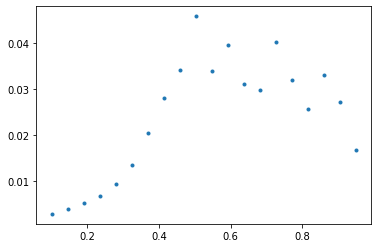

In [42]:
plt.plot(parr,pcr2,'.')

In [43]:
p_c.append(parr[np.where(np.gradient(pcr2[:-4])==np.max(np.gradient(pcr2[:-4])))[0]]  # percolation threshold calculation
                                                                                      # Repeat this simulation varying phi

array([0.45789474])

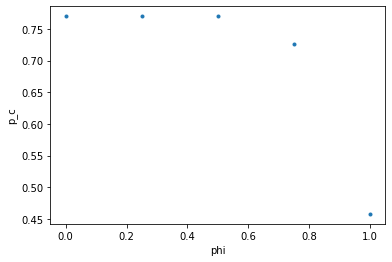

In [44]:
phi = np.linspace(10**-4, 1, 5)
plt.plot(phi, [0.77015263, 0.77015263, 0.77015263, 0.72631579, 0.45789474], '.') # corresponding values of percolation threshold
plt.ylabel('p_c')
plt.xlabel('phi')
plt.savefig('Analytical_Site_Percolation2.png', dpi=300, bbox_inches='tight')

# Analytical equation

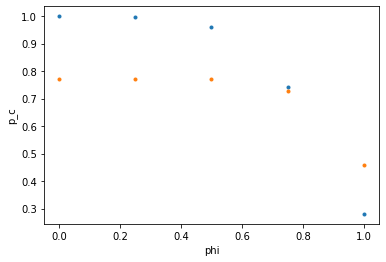

<Figure size 432x288 with 0 Axes>

In [46]:
import math
import matplotlib.pyplot as plt
import numpy as np

L = 10**3
K = 1
phi = [10**-4, 10**-3, 10**-2, 10**-1, 1]
phi_list = np.linspace(10**-4, 1, 5)

shortcuts = []

for i in phi:
    shortcuts_temp = K*L*i
    shortcuts.append(shortcuts_temp)

p_c = []
for i in phi:
    p_c_temp = ((math.sqrt(4*i**2+12*i+1))-(2*i)-1)/(4*i)
    p_c.append(p_c_temp)

plt.plot(phi_list, p_c, '.')
plt.ylabel('p_c')
plt.xlabel('phi')
plt.plot(phi_list, [0.77015263, 0.77015263, 0.77015263, 0.72631579, 0.45789474], '.')
plt.show()
plt.savefig('Analytical_Site_Percolation3.png', dpi=300, bbox_inches='tight')